In [22]:
import pandas as pd
import numpy as np
import re
import dateparser
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string
import matplotlib.pyplot as plt

In [2]:
def read_file(file):
    x = open(file,'r', encoding = 'utf-8')
    y = x.read()
    content = y.splitlines()
    return content

In [3]:
# the text file is just a WhatsApp chat log import
chat = read_file('Chat2.txt')
chat[1]

'09/07/2021, 20:39 - Mathieu: Hello there'

In [4]:
chat = [line.strip() for line in chat]
msgs = []
pos = 0
for line in chat:
    if re.findall("\A\d+[/]", line):
        msgs.append(line)
        pos += 1
    else:
        take = msgs[pos-1] + ". " + line
        msgs.append(take)
        msgs.pop(pos-1)
len(msgs)

329

In [5]:
# I don't think I'm going to do anything with this
time = [msgs[i].split(',')[1].split('-')[0] for i in range(len(msgs))]
time = [s.strip(' ') for s in time]

In [6]:
date = [msgs[i].split(',')[0] for i in range(len(msgs))]
len(date)
name = [msgs[i].split('-')[1].split(':')[0] for i in range(len(msgs))]
len(name)
content = []
for i in range(len(msgs)):
  try:
    content.append(msgs[i].split(':')[2])
  except IndexError:
    content.append('Missing Text')
len(content)

329

In [7]:
df = pd.DataFrame(list(zip(date, time, name, content)), columns = ['Date', 'Time', 'Sender', 'Content'])
df.head(2)

,Date,Time,Sender,Content
0,09/07/2021,20:39,Messages and calls are end,Missing Text
1,09/07/2021,20:39,Mathieu,Hello there


In [8]:
# drop that first line and I guess anything else that would have missing text for whatever reason
df = df[df["Content"]!='Missing Text']
df.reset_index(inplace=True, drop=True)
df.head(1)

,Date,Time,Sender,Content
0,09/07/2021,20:39,Mathieu,Hello there


In [9]:
# it took me so long to figure out that there was a leading space, and I don't know why
df.drop(df[df['Content'] == ' <Media omitted>'].index, inplace=True)

In [10]:
df['Content'].head()

0                     Hello there
1                           oh hi
2     Hope you had a good flight 
3        Well aren’t you up early
4                            Why?
Name: Content, dtype: object

In [13]:
received = df[df['Sender'] == ' Mathieu']
received['Content'].head(2)

0                  Hello there
3     Well aren’t you up early
Name: Content, dtype: object

In [15]:
text = received['Content'].values 
text[0]

' Hello there'

In [17]:
text_string = ""

for item in text:
    text_string += " " + item.lower()

In [18]:
text_string = text_string.split(" ")

In [23]:
clean_text_string = ""

for word in text_string:
    if len(word) > 1 and word.isalnum() and word not in ENGLISH_STOP_WORDS:
        clean_text_string += " " + word.lower().translate(str.maketrans('', '', string.punctuation))
    
clean_text_string.lstrip()

'hello early thank xx oh wow ok hahaha nice did brittany lovely yup yup hey colette doing weekend flying friday gonna ask want hahahahahahahh fun say mean send nudes lol hahaha send face ok hahaha got lol hey bit exhibitionist pick lol drive porsche convincing mean nvm haha car sounds good lol abouts live know roughly pick oh close ok creampies makes hotter lol cover plan lol honest breeding risk kink hot driving convertible warm weather complain oh sad sex mean nicer lol ahaha pragmatic did sleep guy did kinda hot ngl honest fuck like months ago does mean haha good wanted try want feed plan having sex ok feed right cum lol sweetie stick tongue kinda vibe let xx send nude send hmmm breeding material tattoos match knows send video saying just hi maybe confirm unless smart catfish photos stories match believe pill tattoo hips think ahahahahahhaha funny hmm good question need dear photos clothes want fold hand lower gently holding cheeks unload inside kissing forehead right tell taboo thi

In [25]:
words_list = clean_text_string.split(" ")
words_list.sort()

words_list # still don't get why there's an empty string in there

['',
 '11pm',
 'abouts',
 'ago',
 'ah',
 'ahaha',
 'ahahah',
 'ahahahahahhaha',
 'amazing',
 'appreciate',
 'arrived',
 'ask',
 'bad',
 'believe',
 'best',
 'better',
 'bit',
 'blue',
 'break',
 'break',
 'breeding',
 'breeding',
 'brittany',
 'buggs',
 'bunny',
 'car',
 'castle',
 'catfish',
 'chance',
 'check',
 'cheeks',
 'close',
 'clothes',
 'clue',
 'cold',
 'colette',
 'complain',
 'confirm',
 'convertible',
 'convincing',
 'cover',
 'creampies',
 'critique',
 'cum',
 'current',
 'dam',
 'dark',
 'day',
 'dear',
 'did',
 'did',
 'did',
 'did',
 'did',
 'did',
 'did',
 'distracted',
 'does',
 'doing',
 'doing',
 'doing',
 'drive',
 'drive',
 'driving',
 'dry',
 'dtf',
 'dull',
 'dunno',
 'dunstable',
 'early',
 'elephant',
 'enjoy',
 'exhibitionist',
 'extremely',
 'face',
 'fair',
 'feed',
 'feed',
 'feel',
 'fetish',
 'fetishes',
 'flying',
 'fold',
 'forehead',
 'forgot',
 'free',
 'free',
 'friday',
 'friday',
 'fuck',
 'fun',
 'funny',
 'garry',
 'gary',
 'gauging',
 'gently

In [27]:
frequency = Counter(words_list).most_common()
frequency

[('lol', 10),
 ('did', 7),
 ('good', 7),
 ('hey', 6),
 ('send', 6),
 ('ok', 5),
 ('hahaha', 4),
 ('mean', 4),
 ('right', 4),
 ('want', 4),
 ('doing', 3),
 ('haha', 3),
 ('hot', 3),
 ('oh', 3),
 ('sure', 3),
 ('xx', 3),
 ('yup', 3),
 ('break', 2),
 ('breeding', 2),
 ('drive', 2),
 ('feed', 2),
 ('free', 2),
 ('friday', 2),
 ('gonna', 2),
 ('got', 2),
 ('guy', 2),
 ('honest', 2),
 ('humour', 2),
 ('just', 2),
 ('kinda', 2),
 ('know', 2),
 ('knows', 2),
 ('let', 2),
 ('like', 2),
 ('living', 2),
 ('match', 2),
 ('morning', 2),
 ('nice', 2),
 ('office', 2),
 ('photos', 2),
 ('pick', 2),
 ('plan', 2),
 ('question', 2),
 ('sad', 2),
 ('sex', 2),
 ('share', 2),
 ('think', 2),
 ('tryna', 2),
 ('vibe', 2),
 ('wanna', 2),
 ('', 1),
 ('11pm', 1),
 ('abouts', 1),
 ('ago', 1),
 ('ah', 1),
 ('ahaha', 1),
 ('ahahah', 1),
 ('ahahahahahhaha', 1),
 ('amazing', 1),
 ('appreciate', 1),
 ('arrived', 1),
 ('ask', 1),
 ('bad', 1),
 ('believe', 1),
 ('best', 1),
 ('better', 1),
 ('bit', 1),
 ('blue', 1),
 ('b

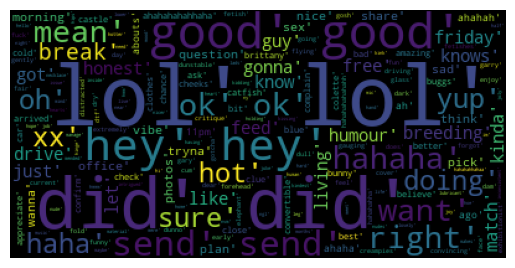

In [28]:
wordcloud = WordCloud().generate(str(words_list))
wordcloud

plt.imshow(wordcloud)
plt.axis("off")
plt.show()